In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('Salary_Data.csv')

#
#y = data['Purchased']
#x = data.drop(["Purchased"],axis = 1)
#
#x
#y

x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

'''from sklearn.impute import SimpleImputer
Simple
imputer = SimpleImputer()
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])'''



'''data_with_dummies = pd.get_dummies(data_no_mv, drop_first=False)
x = data_with_dummies.iloc[:,:5]
y = data_with_dummies.iloc[:,5:7]'''


'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)'''


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 66)


In [5]:
x_train

array([[ 2. ],
       [ 4. ],
       [ 8.7],
       [ 5.3],
       [ 7.9],
       [ 1.5],
       [ 1.1],
       [ 4.5],
       [ 9.6],
       [ 3. ],
       [ 4. ],
       [10.5],
       [ 3.2],
       [ 5.1],
       [ 9. ],
       [ 3.9],
       [ 9.5],
       [ 7.1],
       [ 4.9],
       [ 4.1],
       [ 6. ],
       [ 8.2],
       [10.3],
       [ 6.8]])

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_hat = reg.predict(x_test)

In [8]:
y_hat

array([55110.21252806, 36778.21239052, 59934.42309058, 52215.68619056,
       81160.94956563, 45461.79140304])

In [9]:
y_test

array([64445., 46205., 57189., 56642., 81363., 39891.])

In [10]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
import statsmodels.api as sm
import seaborn as sns
sns.set()

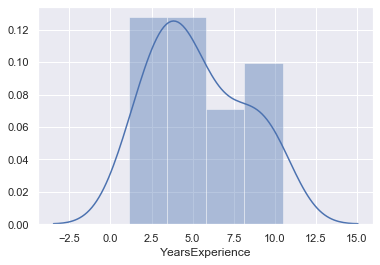

In [12]:
sns.distplot(data['YearsExperience'])

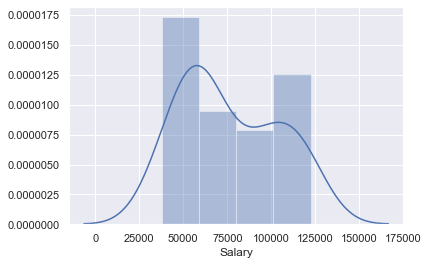

In [13]:
sns.distplot(data['Salary'])

Text(0, 0.5, 'Predictions (y_hat)')

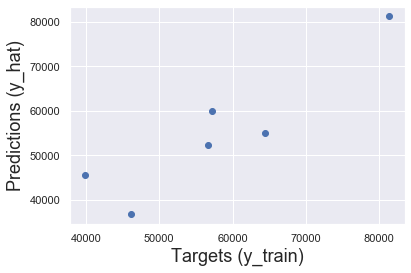

In [15]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_test, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same

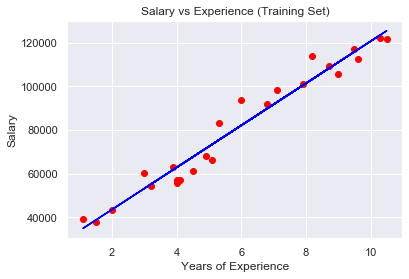

In [16]:
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()



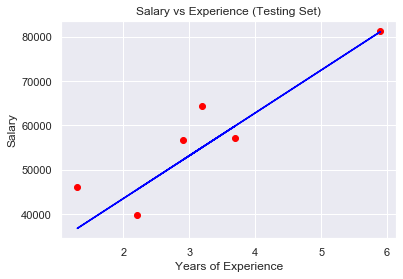

In [17]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,y_hat,color = 'blue')
plt.title('Salary vs Experience (Testing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()